In [1]:
import importlib
import rishi_utils as ru
importlib.reload(ru)
from matplotlib import pyplot as plt
import efrc_ml_production as ml
import numpy as np

/home/modules/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/modules/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import r2_score as r2

In [5]:
import pickle

In [6]:
def parity_plot(res_test_predictions, res_test_label, x_lab='x_axis', y_lab='y_axis', res_train_predictions=None, res_train_label=None, 
                subset_inds=None):
    fig1,ax1 = plt.subplots(figsize = (8,8))


    rmse = ml.get_rmse(res_test_label, res_test_predictions)
    print("Test RMSE is %s" %rmse)

    if res_train_predictions!=None:
        tr_rmse = ml.get_rmse(res_train_label, res_train_predictions)

    from sklearn.metrics import r2_score as r2

    r2_val = r2(y_true=res_test_label, y_pred=res_test_predictions)
    if res_train_predictions!=None:
        r2_tr = r2(y_true=res_train_label, y_pred=res_train_predictions)

    ax1.scatter(res_test_label, res_test_predictions, c='r',s=10, label='Test')
    if subset_inds != None:
        ax1.scatter([res_test_label[i] for i in subset_inds], [res_test_predictions[i] for i in subset_inds], c='b',s=10, label='Subset')
        
    ax1.set_xlabel(x_lab,fontsize=20)
    ax1.set_ylabel(y_lab,fontsize=20)
    max_val = max([max(res_test_label),max(res_test_predictions)])+1
    ax1.set_xlim(0, max_val)
    ax1.set_ylim(0, max_val)

    plot_x_min, plot_x_max = plt.xlim()
    plot_y_min, plot_y_max = plt.ylim()
    ax1.legend()
    ax1.plot(np.linspace(plot_x_min,plot_x_max,100),np.linspace(plot_y_min,plot_y_max,100),c='k',ls='--')
    text_position_x = plot_x_min + (plot_x_max - plot_x_min) * 0.05
    text_position_y = plot_y_max - (plot_y_max - plot_y_min) * 0.25

    try:
        ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse) + '\n' + 
                 "RMSE train=" + str("%.4f" % tr_rmse) + '\n' +
                 "R2 test=" + str("%.4f" % r2_val) + '\n' +
                 "R2 train=" + str("%.4f" % r2_tr), ha='left', fontsize=16)
    except:
        ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse) + '\n' + 
         "R2 test=" + str("%.4f" % r2_val) + '\n', ha='left', fontsize=16)
    fig1.tight_layout()

# For one fold

In [33]:
PATH_TO_DATA_FILE = '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_6_01_41PM_on_May_09_2020.csv'

In [34]:
df = ru.pd_load(PATH_TO_DATA_FILE)

test = df[df['Class'] == 'Test']
true = test['Truth'].tolist()
pred = test['Prediction'].tolist()
pred = [max(i, 0) for i in pred]

In [35]:
len(test)

497795

In [36]:
len(pred)

497795

In [37]:
ml.get_rmse(pred, true)

15.119921482514236

Test RMSE is 15.119921482514236


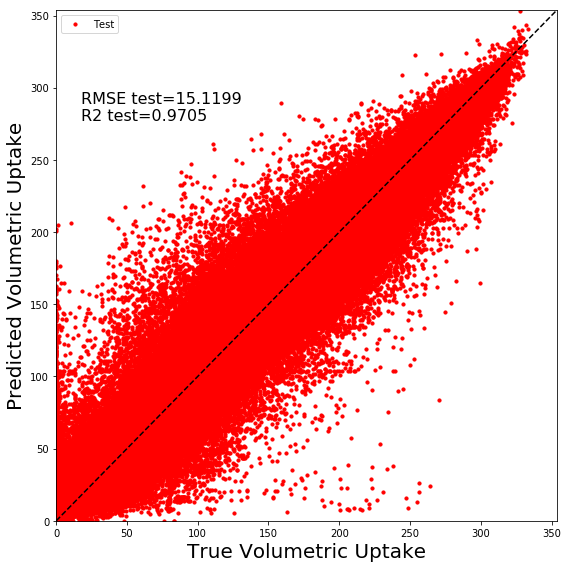

In [38]:
parity_plot(pred, true, x_lab='True Volumetric Uptake', y_lab='Predicted Volumetric Uptake')

# For many folds

In [5]:
PATH_TO_DATA_DIR = '/data/rgur/efrc/paper_data/isotherm_models/no_geo/'

In [6]:
df_paths = [f for f in ru.getAllFilenames(PATH_TO_DATA_DIR) if '.csv' in f and 'results' in f]

In [7]:
df_paths

['/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_4_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_7_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_3_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_5_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_8_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_11_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_0_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_12_01_41PM_on_May_09_2020.csv',
 '/data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_14_01_41PM_on_May_09_2020.csv',
 '/data

In [8]:
n_df = len(df_paths)

In [9]:
for i,f in enumerate(df_paths):
    exec('df_%s = ru.pd_load(f)' %i)

In [10]:
cmd = '['+','.join(['df_%s' %i for i in range(n_df)])+']'

In [11]:
cmd

'[df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14]'

In [14]:
df_list = eval(cmd)

In [22]:
master_df = pd.concat(df_list, ignore_index=True)

In [23]:
len(master_df)

8001450

In [24]:
test = master_df[master_df['Class'] == 'Test']

In [25]:
len(test['Filename'].unique())

126384

In [26]:
pred1 = test['Prediction'].tolist()

In [27]:
pred1 = [max(i, 0) for i in pred1]

In [28]:
truth1 = test['Truth'].tolist()

In [29]:
ml.get_rmse(pred1,truth1)

18.780587442344753

In [30]:
r2(truth1,pred1)

0.9546224772785645

In [31]:
ru.avg_max_n_pct_error(truth1,pred1)

98.32563077513984

Test RMSE is 18.780587442344753


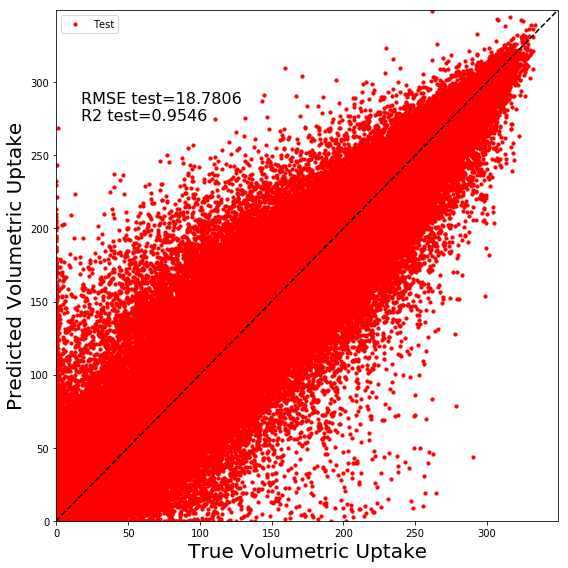

In [32]:
parity_plot(pred1, truth1, x_lab='True Volumetric Uptake', y_lab='Predicted Volumetric Uptake')

# Get RMSE of each fold

In [15]:
rmses = []
am1pes = []
r2s = []
for df in df_list:
    test = df[df['Class'] == 'Test']

    pred1 = test['Prediction'].tolist()

    pred1 = [max(i, 0) for i in pred1]

    truth1 = test['Truth'].tolist()
    
    rmses.append(ml.get_rmse(pred1,truth1))
    r2s.append(r2(truth1,pred1))
    am1pes.append(ru.avg_max_n_pct_error(truth1,pred1))
print("Best Value: ", np.min(rmses), np.min(am1pes), np.max(r2s))
print("Best File: ", df_paths[np.argmin(rmses)], df_paths[np.argmin(am1pes)], df_paths[np.argmax(r2s)])
print("Average: ", np.mean(rmses), np.mean(am1pes), np.mean(r2s))

Best Value:  17.47857013990584 92.38386584935563 0.9620047448748442
Best File:  /data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_6_01_41PM_on_May_09_2020.csv /data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_6_01_41PM_on_May_09_2020.csv /data/rgur/efrc/paper_data/isotherm_models/no_geo/results_iso_code_1010_fold_6_01_41PM_on_May_09_2020.csv
Average:  18.740776002703075 98.03796627786964 0.9528200572175345


In [26]:
rmses

[8.58781445743669,
 8.377217078228915,
 7.323927598894179,
 8.541565035762694,
 6.940445624450883,
 7.4280347640520334,
 7.281046880937513,
 8.588864066432638,
 7.355771684975542,
 7.138448266349931,
 7.095778392972166,
 7.163648527647342,
 8.579722842268957,
 6.927382578907732,
 8.88535843246608]

# Generate isotherms

In [7]:
stacked = ru.pd_load('/data/rgur/efrc/prep_data/all_v1/stacked.csv')

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [8]:
uptake = stacked['vol_uptake'] 

In [9]:
pressure = stacked['pressure']

In [10]:
del stacked

In [267]:
PATH_TO_MODEL = '/data/rgur/efrc/paper_data/isotherm_models/geo/iso_code_1011_fold_6_10_47AM_on_May_08_2020.h5'

In [268]:
with open('/data/rgur/efrc/paper_data/isotherm_models/geo/features/features_code_10111_11_45PM_on_May_09_2020', 'rb') as f:
    features = pickle.load(f)

In [269]:
features_no_si = []
for f in features:
    if f[-3:] == '_si':
        f = f[:-3]
    features_no_si.append(f)

In [13]:
df = ru.pd_load('/data/rgur/efrc/paper_data/isotherm_models/geo/master_feature_df.csv')

In [270]:
results = ru.pd_load('/data/rgur/efrc/paper_data/isotherm_models/geo/results_iso_code_1011_fold_6_10_47AM_on_May_08_2020.csv')

In [266]:
files = [test_fn[iso_ind] for iso_ind in [0,10,20, 100]]

In [271]:
from_files = True

Do not re-run above

In [323]:
i =3

In [324]:
isotherm_inds = [0,10,20, 100, 2, 7]
iso_ind = isotherm_inds[i]

In [325]:
drop_cols = [col for col in df.keys() if 'Unnamed' in col]
test_fn = results[results['Class']=='Test']['Filename'].unique()
test_df = df[df['filename'].isin(test_fn)].reset_index().drop('index', axis=1)

In [326]:
if from_files:
    isotherm_file = files[i]
else:    
    isotherm_file = test_fn[iso_ind]
test_df = df[df['filename']==isotherm_file].reset_index().drop('index', axis=1)
iso_df = results[results['Filename']==isotherm_file]
iso_pressures = iso_df['Pressure']
iso_truth = iso_df['Truth']

In [327]:
pressure_ind = features_no_si.index('norm_log_pressure')

In [328]:
pressure_ind

15

In [329]:
iso_ind

100

In [330]:
l = [j for j in range(len(features_no_si)) if j!=pressure_ind]

In [331]:
trial_fp = test_df[features_no_si].iloc[0]

In [332]:
min_p, max_p = min(df['norm_log_pressure']),max(df['norm_log_pressure'])

In [333]:
trial_pressures = ru.eq_space(min_p, max_p, 50)

In [334]:
trial_arr = np.array([np.concatenate([trial_fp[:pressure_ind], [p], trial_fp[pressure_ind+1:]]) for p in trial_pressures])
#trial_fps = [trial_fp]

In [335]:
model = tf.keras.models.load_model(PATH_TO_MODEL)

In [336]:
preds = model.predict(trial_arr).flatten()

In [337]:
mean = np.mean(uptake)
std = np.std(uptake)
#res_test_predictions = (test_predictions * std) + mean
res_preds = (preds * std) + mean

In [338]:
log_p_mean=np.mean(np.log(pressure))
log_p_std=np.std(np.log(pressure))
res_pressures = np.exp([(i * log_p_std) + log_p_mean for i in trial_pressures]).tolist()

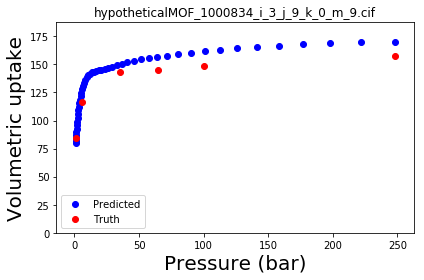

In [339]:
fig1,ax1 = plt.subplots(figsize = (6,4))
plt.scatter(res_pressures, res_preds, c='b', label='Predicted')
plt.scatter(iso_pressures, iso_truth, c='r', label='Truth')
plt.legend()
ax1.set_ylabel('Volumetric uptake',fontsize=20)
ax1.set_xlabel('Pressure (bar)',fontsize=20)
ax1.set_ylim(0,1.1*np.max(np.concatenate([res_preds,iso_truth])))
plt.title(isotherm_file)
plt.tight_layout()